<a href="https://colab.research.google.com/github/khaledmohamed00/OCR_Of_Router-screens/blob/master/OCR_password.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OCR Of Router screens
![alt text](https://miro.medium.com/max/1091/0*wa6uLBFTeg9rcSoC)

##INTRODUCTION
-This notebook demonstrates an approach on  creating deep learning model that can 
recognize the characters in given image.
##Overview the Data Set
the dataset that is given is 600 images with their labels .Each image contains up to 13 characters
## Major libraries and Tools used 
* Tensorflow 1.13.1 (Deep Learning Framework)
* openCv (Computer Vision Libary for image processing)
* Albumentations (Image Augmentation library)[Albumentations GitHub](https://github.com/albumentations-team/albumentations)

##My approch on solving this Task
* My first attempt is to use the images as they are and train the deep learning model end to end
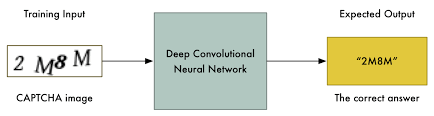
but that requires enough training data and more computation power (Powerful GPU) which i do not have.
* Second attempt is to simplify the problem by splitting the image apart so that that each letter is a separate image, then we only
have to train the neural network to recognize a single letter at a time.
![alt text](https://miro.medium.com/max/2718/1*4ScTIDYJ6rPCAtopRulzOg.png)



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

 51651235_375474403242129_7780736777471393792_n.jpg  "Iskanderyia '18"
'Alex 2018'					     'khaled mohamed cv.pdf'
 best_model.h5					      password_trainv3.csv
'Colab Notebooks'				      project.zip
 C++_Task.zip					      train_passwordv3.zip
 CV						      Untitled0.ipynb
 extracted_letter_images.zip			      Untitled1.ipynb
'Graduation Project'				      Untitled2.ipynb


In [0]:
!unzip '/content/drive/My Drive/symbols_02.zip'

Archive:  /content/drive/My Drive/symbols_02.zip
replace symbols_02/U/3250_U (9th copy).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: symbols_02/U/3250_U (9th copy).jpg  
replace symbols_02/U/3192_U (9th copy).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: symbols_02/U/3192_U (9th copy).jpg  
 extracting: symbols_02/U/3049_U (9th copy).jpg  
  inflating: symbols_02/U/3029_U (9th copy).jpg  
  inflating: symbols_02/U/2693_U (9th copy).jpg  
 extracting: symbols_02/U/2683_U (9th copy).jpg  
 extracting: symbols_02/U/2673_U (9th copy).jpg  
 extracting: symbols_02/U/2055_U (9th copy).jpg  
 extracting: symbols_02/U/001199 (9th copy).png  
 extracting: symbols_02/U/4948_U (8th copy).jpg  
 extracting: symbols_02/U/4936_U (8th copy).jpg  
  inflating: symbols_02/U/3273_U (8th copy).jpg  
 extracting: symbols_02/U/3261_U (8th copy).jpg  
 extracting: symbols_02/U/3250_U (8th copy).jpg  
 extracting: symbols_02/U/3192_U (8th copy).jpg  
 extracting: symbols_02/U/3049_U 

In [0]:
!unzip '/content/drive/My Drive/train_passwordv3.zip'

Archive:  /content/drive/My Drive/train_passwordv3.zip
   creating: train_passwordv3/
  inflating: train_passwordv3/IMG_20190423_134159.jpg  
  inflating: train_passwordv3/IMG_20190423_134140.jpg  
  inflating: train_passwordv3/IMG_20190423_134137.jpg  
  inflating: train_passwordv3/IMG_20190423_134112.jpg  
  inflating: train_passwordv3/IMG_20190423_134107.jpg  
  inflating: train_passwordv3/IMG_20190423_134104.jpg  
  inflating: train_passwordv3/IMG_20190423_134032.jpg  
  inflating: train_passwordv3/IMG_20190423_134029.jpg  
  inflating: train_passwordv3/IMG_20190423_134026.jpg  
  inflating: train_passwordv3/IMG_20190423_133958.jpg  
  inflating: train_passwordv3/IMG_20190423_133954.jpg  
  inflating: train_passwordv3/IMG_20190423_133950.jpg  
  inflating: train_passwordv3/IMG_20190423_133919.jpg  
  inflating: train_passwordv3/IMG_20190423_133911.jpg  
  inflating: train_passwordv3/IMG_20190423_133908.jpg  
  inflating: train_passwordv3/IMG_20190423_133851.jpg  
  inflating: train

In [0]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 46kB/s 
     |████████████████████████████████| 368kB 39.2MB/s 
     |████████████████████████████████| 3.2MB 56.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
!pip install -U git+https://github.com/albu/albumentations



  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-i0_x6xga
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-i0_x6xga
     |████████████████████████████████| 634kB 19.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.4-cp36-none-any.whl size=61995 sha256=ea3c915616299b82dd33ec0476be856da1b5afd6cbf38f42433d967d0a7869a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-nce4plp0/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=4167a98114f6638523ba90af90fe83d387e90532c2268672653c810977840454
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
 

In [0]:
!pip install scikit-learn==0.19.1

     |████████████████████████████████| 12.4MB 1.4MB/s 
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


##Creating Dataset
Creating the dataset by splitting the image apart so that that each letter is a separate image using OpenCV library . i applied that to the given dataset to create the new dataset that contians separate image for each character with its label and save it in sympols_02 folder.
The demonstration of this method is given below where each character is bounded with box.   

In [0]:
path='/content/train_passwordv3/'    
train_id_img_list=os.listdir('/content/train_passwordv3')
n_train = len(os.listdir('/content/train_passwordv3'))
train = pd.read_csv('/content/drive/My Drive/password_trainv3.csv')

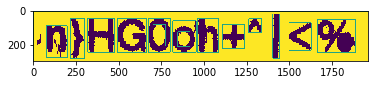

In [0]:
import cv2
import numpy as np
import imutils
from imutils import contours

img = cv2.imread(f"{path}{train['filename'][5]}")
outputImage = cv2.copyMakeBorder(
                 img, 
                 20, 
                 20, 
                 20, 
                 20, 
                 cv2.BORDER_CONSTANT, 
                 value=255
              )
gray = cv2.cvtColor(outputImage, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)[1]

kernel = np.ones((5,4), np.uint8)

img_erode = cv2.erode(thresh, kernel, iterations = 1)

cons = cv2.findContours(img_erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cons = cons[0] #if imutils.is_cv2() else contours[1]

letter_image_regions = []

output = img_erode.copy()
cons = sorted(cons, key=cv2.contourArea, reverse=True)[:15]
cons = contours.sort_contours(cons)[0]
for con in cons:

    (x, y, w, h) = cv2.boundingRect(con)

    if cv2.contourArea(con) > 200:
 
        
        cv2.rectangle(output, (x, y), (x + w, y + h), 150, 3)

plt.imshow(img_erode)
plt.imshow(output)

## DATASETS , DATALOADERS Classes and helper functions

In [0]:
import os
import pandas as pd
import tensorflow as tf
import cv2
import keras as K
import numpy as np
import matplotlib.pyplot as plt
import keras
import os.path
from imutils import paths

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.models import load_model


from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,IAAAdditiveGaussianNoise,
    IAASharpen, IAAEmboss, RandomContrast, RandomBrightness, Flip, OneOf, Compose, RandomGamma, ElasticTransform, ChannelShuffle,RGBShift, Rotate
)

class Dataset:

    
    
    def __init__(
            self,
            image_id_list,
            labels,
            no_chars,
            char_to_int,
            int_to_char,
            augmentation=None, 
    ):
        self.ids = image_id_list
        self.images_fps = [image_id for image_id in self.ids]
        self.labels=labels
        self.augmentation = augmentation
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])

        # Grab the name of the letter based on the folder it was in
        label = self.images_fps[i].split(os.path.sep)[-2]
        
        one_hot_enoded=np.zeros([no_chars])
        for  i,char  in  enumerate(self.labels[i]):
             one_hot_enoded[char_to_int[label]]=1
        # apply augmentations

        if self.augmentation:
            sample = self.augmentation(image=image)
            image= sample['image']
 
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        # Resize the letter so it fits in a 20x20 pixel box
        image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)#resize_to_fit(image, 50, 50)
        image = np.expand_dims(image, axis=2)
        image=image/255.0
        
        return image,one_hot_enoded
        
    def __len__(self):
        return len(self.ids)


class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)



# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        #ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        IAAAdditiveGaussianNoise(p=0.5),
        IAAPerspective(p=0.5),

        OneOf(
            [
                CLAHE(p=0.5),
                RandomBrightness(p=0.5),
                RandomGamma(p=0.5),
            ],
            p=0.5,
        ),

        OneOf(
            [
                IAASharpen(p=0.5),
                Blur(blur_limit=3, p=0.5),
                MotionBlur(blur_limit=3, p=0.5),
            ],
            p=0.5,
        ),

        OneOf(
            [
                RandomContrast(p=0.5),
                HueSaturationValue(p=0.5),
            ],
            p=0.5,
        ),
        #Lambda(mask=round_clip_0_1)
    ]
    return Compose(train_transform)

def get_data(LETTER_IMAGES_FOLDER):
    # initialize the data and labels
    data = []
    labels = []
    # loop over the input images

    for i,image_file in enumerate(paths.list_images(LETTER_IMAGES_FOLDER)):
        # Load the image and convert it to grayscale
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        # Resize the letter so it fits in a 20x20 pixel box
        image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)#resize_to_fit(image, 50, 50)

        # Add a third channel dimension to the image to make Keras happy
        image = np.expand_dims(image, axis=2)

        # Grab the name of the letter based on the folder it was in
        label = image_file.split(os.path.sep)[-2]

        # Add the letter image and it's label to our training data
        data.append(image)
        labels.append(label)
        print("load image:",i)
    return data,labels
   



In [0]:
LETTER_IMAGES_FOLDER = "symbols_02"


data,labels=get_data(LETTER_IMAGES_FOLDER)
data = np.array(data, dtype="float") 
labels = np.array(labels)
chars_set=set(labels)

no_chars=len(chars_set)
chars_list=list(chars_set)
chars_list.sort()
char_to_int = dict((c, i) for i, c in enumerate(chars_list))
int_to_char = dict((i, c) for i, c in enumerate(chars_list))

img_paths=[]
for img_path in paths.list_images(LETTER_IMAGES_FOLDER):
    img_paths.append(img_path)

img_paths=np.array(img_paths)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    img_paths,labels, random_state=2019, test_size=0.05)


load image: 0
load image: 1
load image: 2
load image: 3
load image: 4
load image: 5
load image: 6
load image: 7
load image: 8
load image: 9
load image: 10
load image: 11
load image: 12
load image: 13
load image: 14
load image: 15
load image: 16
load image: 17
load image: 18
load image: 19
load image: 20
load image: 21
load image: 22
load image: 23
load image: 24
load image: 25
load image: 26
load image: 27
load image: 28
load image: 29
load image: 30
load image: 31
load image: 32
load image: 33
load image: 34
load image: 35
load image: 36
load image: 37
load image: 38
load image: 39
load image: 40
load image: 41
load image: 42
load image: 43
load image: 44
load image: 45
load image: 46
load image: 47
load image: 48
load image: 49
load image: 50
load image: 51
load image: 52
load image: 53
load image: 54
load image: 55
load image: 56
load image: 57
load image: 58
load image: 59
load image: 60
load image: 61
load image: 62
load image: 63
load image: 64
load image: 65
load image: 66
load 

In [0]:
# paths.list_images(LETTER_IMAGES_FOLDER):
train_dataset = Dataset(
    X_train,
    y_train,
    no_chars,
    char_to_int,
    int_to_char,
    augmentation=get_training_augmentation(),
)       

valid_dataset = Dataset(
    X_valid,
    y_valid,
    no_chars,
    char_to_int,
    int_to_char,
    augmentation=None,
)       

BATCH_SIZE=16
EPOCHS=30
train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)


assert train_dataloader[0][0].shape == (BATCH_SIZE, 50,50,1)
assert train_dataloader[0][1].shape == (BATCH_SIZE,no_chars)






## Creating the deep learning model 

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.models import load_model
from keras.layers import  Dropout,BatchNormalization

# Build the neural network!



def conv_model_01(no_chars):
    model = Sequential()

    # First convolutional layer with max pooling
    model.add(Conv2D(16, (5, 5), padding="same", input_shape=(50,50,1), activation="relu"))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # Second convolutional layer with max pooling
    model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=1))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    # third convolutional layer with max pooling
    model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # fourth convolutional layer with max pooling
    model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.1))

    # fifth layer with 500 nodes
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    # Output layer with 32 nodes (one for each possible letter/number we predict)
    model.add(Dense(no_chars, activation="softmax"))
    
    return model 



In [0]:
model=conv_model_01(no_chars)  
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
#model.load_weights('/content/drive/My Drive/conv03_best_model.h5')

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 16)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        12832     
_________________________________________________________________

## Training the model

In [0]:
callbacks = [
    keras.callbacks.ModelCheckpoint('./conv06_best_model.h5', save_weights_only=True, save_best_only=True, mode='min'),
]
# train model


history = model.fit_generator(
    train_dataloader, 
    steps_per_epoch=len(train_dataloader), 
    epochs=EPOCHS, 
    callbacks=callbacks, 
    validation_data=valid_dataloader, 
    validation_steps=len(valid_dataloader),
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
2929/2929 [==============================] - 160s 55ms/step - loss: 0.3623 - acc: 0.9038 - val_loss: 0.0945 - val_acc: 0.9789
Epoch 2/30
2929/2929 [==============================] - 156s 53ms/step - loss: 0.1380 - acc: 0.9607 - val_loss: 0.0417 - val_acc: 0.9882
Epoch 3/30
2929/2929 [==============================] - 155s 53ms/step - loss: 0.1101 - acc: 0.9675 - val_loss: 0.0424 - val_acc: 0.9814
Epoch 4/30
2929/2929 [==============================] - 155s 53ms/step - loss: 0.0978 - acc: 0.9711 - val_loss: 0.0344 - val_acc: 0.9903
Epoch 5/30
2929/2929 [==============================] - 156s 53ms/step - loss: 0.0889 - acc: 0.9738 - val_loss: 0.0407 - val_acc: 0.9874
Epoch 6/30
2929/2929 [==============================] - 157s 54ms/step - loss: 0.0804 - acc: 0.9760 - val_loss: 0.0318 - val_acc: 0.9899
Epoch 7/30
2929/2929 [==============================] - 156s 53ms/step - loss: 0.0740 - acc: 0.9777 - val_loss: 0.0339 - val_acc: 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


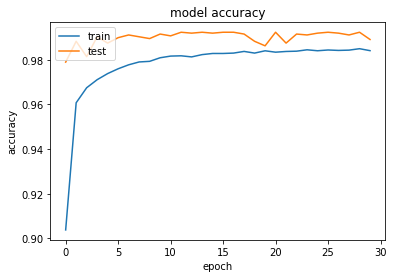

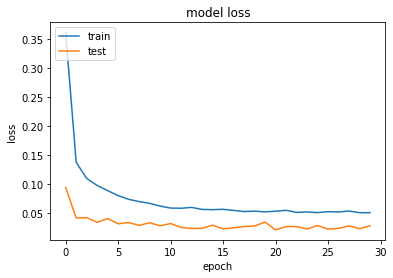

In [0]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Loading the model

In [0]:
#model=conv_model_01(no_chars)
model.load_weights('/content/drive/My Drive/conv06_best_model.h5')

## Model Evaluation 

In [0]:
from imutils import contours
def image_seprate_char(image_id):
    img = cv2.imread(f"{path}{image_id}")
    outputImage = cv2.copyMakeBorder(
                 img, 
                 20, 
                 20, 
                 20, 
                 20, 
                 cv2.BORDER_CONSTANT, 
                 value=255
              )
    imgray = cv2.cvtColor(outputImage,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(imgray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    #print(thresh.shape)
    cons,image= cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #image, cons, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    image_list=[]
    characters=[]
    
    #plt.imshow(thresh)    

    cons = sorted(cons, key=cv2.contourArea, reverse=True)[:13]
    cons = contours.sort_contours(cons)[0]
    count=0
    hist_x=0
    for c in cons:
        (x, y, w, h) = cv2.boundingRect(c)
        roi = thresh[y - 5:y + h + 5, x - 5:x + w + 5]
        if (roi.shape[0]<50 and roi.shape[0]<50) :
            hist_x=x
            continue
        if abs(hist_x-x)<50:
          hist_x=x
          continue
        hist_x=x

        # Resize the letter so it fits in a 50x50 pixel box
        image = cv2.resize(roi, (50,50), interpolation = cv2.INTER_AREA)#resize_to_fit(image, 50, 50)    
        image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        image = np.expand_dims(image, axis=2)
        pred=model.predict(image.reshape(1,50,50,1))
        #print(int_to_char[np.argmax(pred)],count)
        characters.append(int_to_char[np.argmax(pred)])
        count+=1
        image_list.append(image)
    return image_list,characters    

In [0]:
path='/content/train_passwordv3/'    
train_id_img_list=os.listdir('/content/train_passwordv3')
n_train = len(os.listdir('/content/train_passwordv3'))
train = pd.read_csv('/content/drive/My Drive/password_trainv3.csv')


## Some samples of the predictions of the model 

} 0
< 1
6 2
S 3
> 4
Z 5
9 6
X 7
J 8
I 9


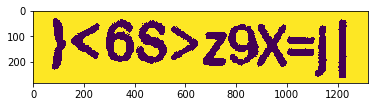

In [0]:
image_list,characters=image_seprate_char(train['filename'][1])    

8 0
m 1
X 2
5 3
+ 4
P 5
d 6
L 7
$ 8
1 9
L 10
y 11


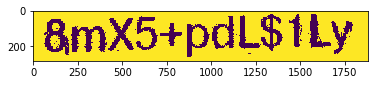

In [0]:
image_list,characters=image_seprate_char(train['filename'][150])    

} 0
< 1
6 2
S 3
> 4
Z 5
9 6
X 7
J 8
I 9


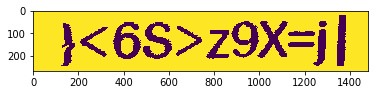

In [0]:
image_list,characters=image_seprate_char(train['filename'][0])    

m 0
X 1
( 2
I 3
1 4
? 5
1 6
S 7
L 8
I 9


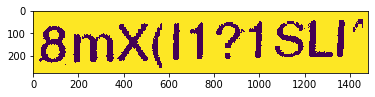

In [0]:
image_list,characters=image_seprate_char(train['filename'][11])    

O 0
W 1
W 2
d 3
R 4
H 5
u 6
d 7
O 8
d 9


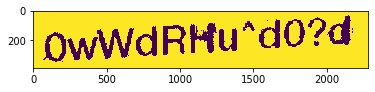

In [0]:
image_list,characters=image_seprate_char(train['filename'][50])    

## Evaluation of the model on the test set

In [0]:
def model_evaluation():
    np.random.seed(0)
    correct=0
    total=0
    for i in np.random.randint(200,size=50):
        try:
           image_list,characters=image_seprate_char(train['filename'][i])
        except:
           continue  
        for j,k in zip(range(len(list(train['password'][i]))),range(len(characters))):
       
            if list(train['password'][i])[j] not in chars_set:
                k-=1
                continue       
            total+=1
            if list(train['password'][i])[j]==characters[k]:
               correct+=1
    print("accuracy",correct/total)



In [0]:
model_evaluation()

accuracy 0.49184149184149184
